In [49]:
from voicenet.datasets import stamerican
from voicenet.training import GMMModelTraining
from voicenet.utils import FeatureExtraction
import os
import numpy as np
from keras import models
from keras import layers
from keras.layers import Dropout
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt

In [2]:
# stamerican(direc='./data/raw')

(x_train, y_train), (x_test, y_test) = stamerican('../data/raw')

print(y_test)

../data/raw
ST-AEDS-20180100_1-OS.tgz already downloaded
No extraction was performed !
f0001
0
0
{'f0001': [], 'f0002': [], 'f0003': [], 'f0004': [], 'f0005': [], 'm0001': [], 'm0002': [], 'm0003': [], 'm0004': [], 'm0005': []}
[]
f0002
0
0
{'f0001': [], 'f0002': [], 'f0003': [], 'f0004': [], 'f0005': [], 'm0001': [], 'm0002': [], 'm0003': [], 'm0004': [], 'm0005': []}
[]
f0003
0
0
{'f0001': [], 'f0002': [], 'f0003': [], 'f0004': [], 'f0005': [], 'm0001': [], 'm0002': [], 'm0003': [], 'm0004': [], 'm0005': []}
[]
f0004
0
0
{'f0001': [], 'f0002': [], 'f0003': [], 'f0004': [], 'f0005': [], 'm0001': [], 'm0002': [], 'm0003': [], 'm0004': [], 'm0005': []}
[]
f0005
0
0
{'f0001': [], 'f0002': [], 'f0003': [], 'f0004': [], 'f0005': [], 'm0001': [], 'm0002': [], 'm0003': [], 'm0004': [], 'm0005': []}
[]
m0001
0
0
{'f0001': [], 'f0002': [], 'f0003': [], 'f0004': [], 'f0005': [], 'm0001': [], 'm0002': [], 'm0003': [], 'm0004': [], 'm0005': []}
[]
m0002
0
0
{'f0001': [], 'f0002': [], 'f0003': [],

In [3]:
def collect_features(files_list):
        
        """ Create features for all '.wav' files contains in files_list
        
        Arguments:
            files_list: takes a list of '.wav' training files

        Returns:
            features: creates a vector of all .wav training files and stack them over as an array
        """
        
        features = np.asarray(())
        
        for file in files_list:
            
#             logging.info("Creating features for {0}".format(file))
            
            # mfccfeatures = mfcc_features()
            vector = FeatureExtraction.mfcc_feature(file)
            
#             print(vector.shape)
            
            vector1 = np.dot(np.transpose(vector),vector)
            
#             print(vector1.shape)
            
            ## If features array is empty then stacking is not possible.
            if features.size == 0:
                features = vector1.flatten()
                
            else:
                features = np.vstack((features, vector1.flatten()))
                
        return features

In [4]:
print(x_train)

['../data/raw/ST-AEDS/TrainingData/females/f0005_us_f0005_00138.wav', '../data/raw/ST-AEDS/TrainingData/females/f0002_us_f0002_00079.wav', '../data/raw/ST-AEDS/TrainingData/females/f0005_us_f0005_00411.wav', '../data/raw/ST-AEDS/TrainingData/females/f0003_us_f0003_00092.wav', '../data/raw/ST-AEDS/TrainingData/females/f0005_us_f0005_00279.wav', '../data/raw/ST-AEDS/TrainingData/females/f0004_us_f0004_00083.wav', '../data/raw/ST-AEDS/TrainingData/females/f0004_us_f0004_00364.wav', '../data/raw/ST-AEDS/TrainingData/females/f0001_us_f0001_00254.wav', '../data/raw/ST-AEDS/TrainingData/females/f0004_us_f0004_00253.wav', '../data/raw/ST-AEDS/TrainingData/females/f0002_us_f0002_00309.wav', '../data/raw/ST-AEDS/TrainingData/females/f0002_us_f0002_00374.wav', '../data/raw/ST-AEDS/TrainingData/females/f0002_us_f0002_00337.wav', '../data/raw/ST-AEDS/TrainingData/females/f0005_us_f0005_00028.wav', '../data/raw/ST-AEDS/TrainingData/females/f0001_us_f0001_00128.wav', '../data/raw/ST-AEDS/TrainingData

In [5]:
X_train = collect_features(x_train)

In [6]:
X_train.shape

(2557, 1521)

In [10]:
np.array(y_train).shape

(2557,)

In [32]:
len(x_train)

2557

In [27]:
99723/2557

39.0

In [55]:
model = models.Sequential()
# model.add(layers.Dense(512, activation='relu', )
# model.add(layers.Dense(512, activation='relu', input_shape =(X_train.shape[1],)))
# model.add(BatchNormalization())
# model.add(Dropout(0.50))
model.add(layers.Dense(256, activation='relu', input_shape =(X_train.shape[1],)))
# model.add(layers.Dense(256, activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(128, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
# model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.Dense(32, activation='relu'))
model.add(BatchNormalization())
# model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [56]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [57]:
history  = model.fit(X_train,np.array(np.array(y_train).reshape((len(y_train),1))), epochs=200, batch_size=64, validation_split=0.2)

Epoch 1/200
32/32 [==============================] - 0s 9ms/step - loss: 3.4393e-08 - accuracy: 0.5115 - val_loss: 1.1921e-07 - val_accuracy: 0.0469
Epoch 2/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.5051 - val_loss: 1.1921e-07 - val_accuracy: 0.1719
Epoch 3/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.5046 - val_loss: 1.1921e-07 - val_accuracy: 0.3066
Epoch 4/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.4900 - val_loss: 1.1921e-07 - val_accuracy: 0.4180
Epoch 5/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.4817 - val_loss: 1.1921e-07 - val_accuracy: 0.4902
Epoch 6/200
32/32 [==============================] - 0s 7ms/step - loss: 3.4393e-08 - accuracy: 0.4924 - val_loss: 1.1921e-07 - val_accuracy: 0.5215
Epoch 7/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.4983 - v

Epoch 56/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.4919 - val_loss: 1.1921e-07 - val_accuracy: 0.5723
Epoch 57/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.4856 - val_loss: 1.1921e-07 - val_accuracy: 0.5742
Epoch 58/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.5046 - val_loss: 1.1921e-07 - val_accuracy: 0.5703
Epoch 59/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.5120 - val_loss: 1.1921e-07 - val_accuracy: 0.5723
Epoch 60/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.5139 - val_loss: 1.1921e-07 - val_accuracy: 0.5605
Epoch 61/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.5027 - val_loss: 1.1921e-07 - val_accuracy: 0.5586
Epoch 62/200
32/32 [==============================] - 0s 7ms/step - loss: 3.4393e-08 - accuracy: 0.5

32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.5081 - val_loss: 1.1921e-07 - val_accuracy: 0.5762
Epoch 111/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.4958 - val_loss: 1.1921e-07 - val_accuracy: 0.5840
Epoch 112/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.5130 - val_loss: 1.1921e-07 - val_accuracy: 0.5840
Epoch 113/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.4910 - val_loss: 1.1921e-07 - val_accuracy: 0.5918
Epoch 114/200
32/32 [==============================] - 0s 7ms/step - loss: 3.4393e-08 - accuracy: 0.5017 - val_loss: 1.1921e-07 - val_accuracy: 0.5840
Epoch 115/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.4973 - val_loss: 1.1921e-07 - val_accuracy: 0.5859
Epoch 116/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.4817 - v

32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.5188 - val_loss: 1.1921e-07 - val_accuracy: 0.5586
Epoch 165/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.4934 - val_loss: 1.1921e-07 - val_accuracy: 0.5645
Epoch 166/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.4968 - val_loss: 1.1921e-07 - val_accuracy: 0.5586
Epoch 167/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.5095 - val_loss: 1.1921e-07 - val_accuracy: 0.5566
Epoch 168/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.4880 - val_loss: 1.1921e-07 - val_accuracy: 0.5605
Epoch 169/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.5007 - val_loss: 1.1921e-07 - val_accuracy: 0.5645
Epoch 170/200
32/32 [==============================] - 0s 6ms/step - loss: 3.4393e-08 - accuracy: 0.4914 - v

In [48]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


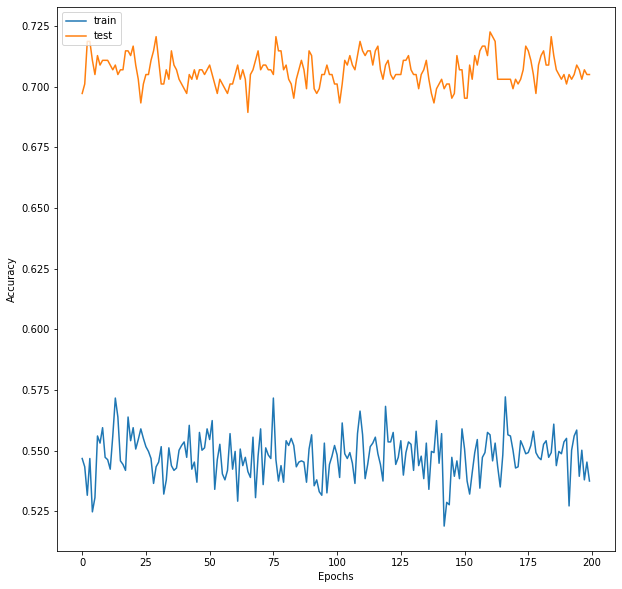

In [54]:
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [15]:
np.array(np.array(y_train).reshape((len(y_train),1))).shape

(2557, 1)

In [19]:
2557/128

19.9765625